In [94]:
import torch
import tensorflow as tf
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import infomap
import community as community_louvain
import graph_tool.all as gt

from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [73]:
dataset = Planetoid(root='/tmp/Cora', name='Cora')

print(f'Dataset: {dataset}')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of node features: {dataset.num_node_features}')

Dataset: Cora()
Number of graphs: 1
Number of classes: 7
Number of node features: 1433


In [74]:
# Extract the graph data
data = dataset[0]  # Cora contains only one graph

print(data)
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Number of validation nodes: {data.val_mask.sum()}')
print(f'Number of test nodes: {data.test_mask.sum()}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Number of validation nodes: 500
Number of test nodes: 1000
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In addition, each document is allocated to one of the 7 communities.
1.	Case-Based
2.	Genetic Algorithms
3.	Neural Networks
4.	Probabilistic Methods
5.	Reinforcement Learning
6.	Rule Learning
7.	Theory

In [75]:
# Convert to networkx data
G = to_networkx(data, to_undirected=False)

## Infomap

In [76]:
# Initialise Infomap
im = infomap.Infomap("--directed")

# Add directed edges from the graph
for edge in G.edges():
    im.add_link(edge[0], edge[1])

# Run Infomap algorithm
im.run()

# Extract communities
partition = {node: im.get_modules()[node] for node in G.nodes()}
community_labels = [partition[node] for node in G.nodes()]

  Infomap v2.8.0 starts at 2025-03-08 15:47:08
  -> Input network: 
  -> No file output!
  -> Configuration: directed
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'directed'... 
  -> Using unrecorded teleportation to links. 
  -> PageRank calculation done in 50 iterations.

  => Sum node flow: 1, sum link flow: 1
Build internal network with 2708 nodes and 10556 links...
  -> One-level codelength: 10.8917439

Trial 1/1 starting at 2025-03-08 15:47:08
Two-level compression: 41% 1.1% 0.160822988% 0.020042909% 0.019142393% 
Partitioned to codelength 1.78410558 + 4.60447285 = 6.388578424 in 284 modules.
Super-level compression: 3.57793823% to codelength 6.159999035 in 90 top modules.

Recursive sub-structure compression: 23.9245049% 0.472947273% 0.000899349855% 0% . Found 5 levels with codelength 6.045247308

=> Trial 1/1 finished in 0.056719917s with codelength 6.04524731


Summary after 1 trial
Best end 

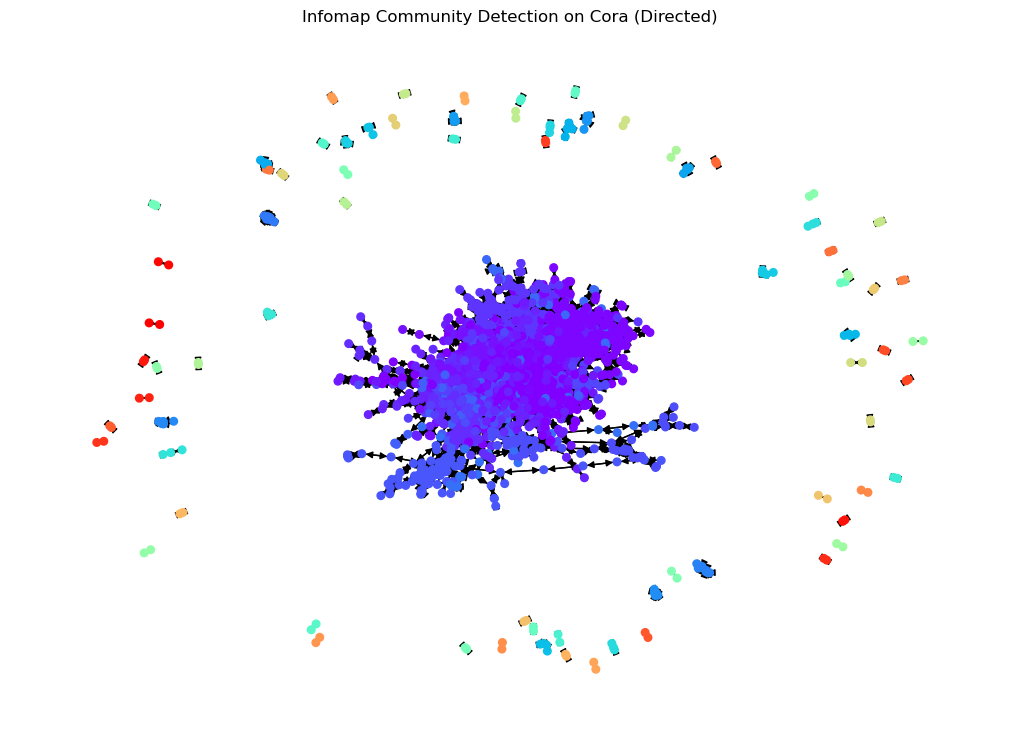

In [77]:
plt.figure(figsize=(10, 7))
nx.draw(G, node_color=community_labels, cmap=plt.cm.rainbow, node_size=30)
plt.title("Infomap Community Detection on Cora (Directed)")
plt.show()

In [78]:
# Count number of nodes in each community
community_counts = Counter(community_labels)

# Print community size distribution
print(f"Total communities found: {len(community_counts)}")
print("Community sizes:", dict(community_counts))

Total communities found: 90
Community sizes: {4: 242, 5: 245, 89: 2, 2: 435, 6: 166, 81: 2, 12: 71, 3: 252, 1: 487, 19: 5, 9: 84, 7: 185, 10: 86, 13: 26, 16: 8, 64: 2, 8: 114, 11: 94, 24: 4, 63: 2, 15: 9, 54: 2, 26: 3, 17: 6, 50: 2, 45: 2, 28: 3, 14: 24, 41: 2, 39: 2, 37: 2, 36: 2, 34: 2, 33: 3, 35: 2, 21: 4, 20: 4, 38: 2, 30: 3, 40: 2, 29: 3, 42: 2, 43: 2, 44: 2, 27: 4, 46: 2, 47: 2, 48: 2, 49: 2, 23: 5, 51: 2, 52: 2, 53: 2, 32: 3, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 31: 3, 22: 4, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 18: 5, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 25: 4, 90: 2}


## SBM

SBM detected 34 communities
Communities with fewer than 10 nodes: [1220 1359]
Removing 4 vertices.
Remaining nodes per community after filtering:
Community 62: 72 nodes
Community 70: 71 nodes
Community 85: 49 nodes
Community 228: 79 nodes
Community 281: 68 nodes
Community 315: 165 nodes
Community 377: 34 nodes
Community 378: 108 nodes
Community 499: 58 nodes
Community 528: 94 nodes
Community 548: 129 nodes
Community 724: 73 nodes
Community 839: 50 nodes
Community 1157: 102 nodes
Community 1286: 94 nodes
Community 1329: 39 nodes
Community 1402: 88 nodes
Community 1421: 76 nodes
Community 1473: 51 nodes
Community 1739: 154 nodes
Community 1883: 78 nodes
Community 1897: 92 nodes
Community 1899: 124 nodes
Community 2034: 86 nodes
Community 2249: 41 nodes
Community 2381: 113 nodes
Community 2415: 85 nodes
Community 2451: 26 nodes
Community 2452: 116 nodes
Community 2505: 82 nodes
Community 2509: 77 nodes
Community 2561: 130 nodes


/var/folders/0r/kk1hzrmn3gn15tq_k14nb0r00000gn/T/ipykernel_31674/4003872652.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis", len(unique_remaining))


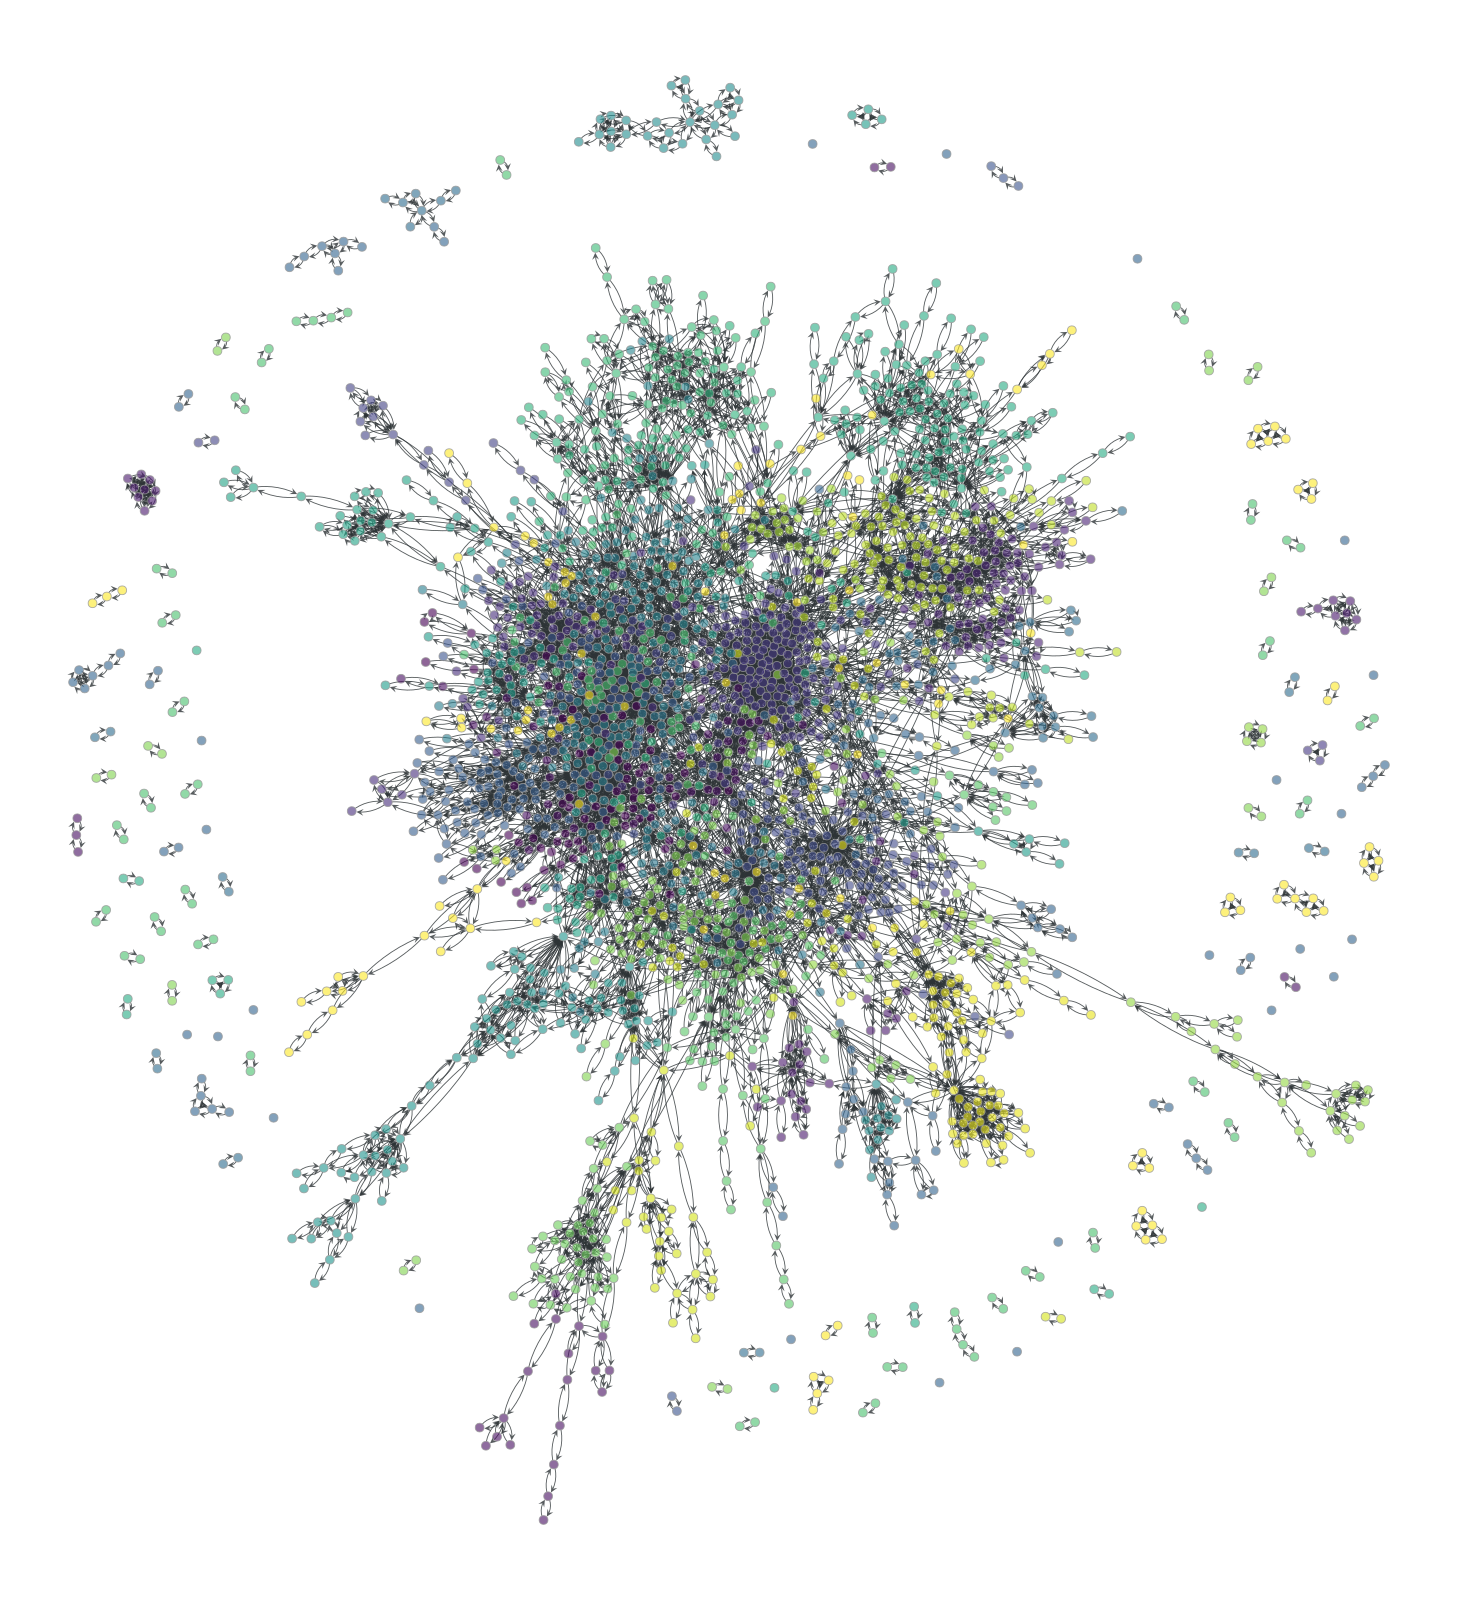

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17feef910, at 0x386149ed0>

In [101]:
# -------------------------------
# 1. Build the Graph-Tool graph
# -------------------------------

# Convert PyG data to a directed NetworkX graph
G_nx = to_networkx(data, to_undirected=False)

# Convert NetworkX graph to Graph-tool graph
G_gt = gt.Graph(directed=True)
G_gt.add_edge_list(G_nx.edges())

nodes_list = list(G_nx.nodes())
orig_idx_prop = G_gt.new_vertex_property("int")
for i, v in enumerate(G_gt.vertices()):
    orig_idx_prop[v] = nodes_list[i]



# -------------------------------
# 2. Run SBM and assign labels
# -------------------------------

state = gt.minimize_blockmodel_dl(G_gt)
sbm_labels = state.get_blocks().a  # Community labels from SBM

# Create a vertex property to store SBM labels in the Graph-tool graph
vprop = G_gt.new_vertex_property("int")
for v in G_gt.vertices():
    vprop[v] = sbm_labels[int(v)]

# Print how many SBM communities we have
num_detected_communities = len(set(sbm_labels))
print(f"SBM detected {num_detected_communities} communities")

# -------------------------------
# 3. Filter out small communities
# -------------------------------

# Compute community sizes
unique_labels, counts = np.unique(sbm_labels, return_counts=True)
# Identify communities with fewer than 10 nodes
small_comms = unique_labels[counts < 10]
print("Communities with fewer than 10 nodes:", small_comms)

# Collect vertices that belong to these small communities
vertices_to_remove = [v for v in G_gt.vertices() if vprop[v] in small_comms]
print(f"Removing {len(vertices_to_remove)} vertices.")
# Remove the vertices (and all associated data) from the graph
G_gt.remove_vertex(vertices_to_remove, fast=True)

# -------------------------------
# 4. Print number of nodes per community after filtering
# -------------------------------

# After removal, get the community labels of the remaining nodes
remaining_labels = [vprop[v] for v in G_gt.vertices()]
unique_rem, counts_rem = np.unique(remaining_labels, return_counts=True)
print("Remaining nodes per community after filtering:")
for label, count in zip(unique_rem, counts_rem):
    print(f"Community {label}: {count} nodes")

# -------------------------------
# 5. Visualize the filtered graph
# -------------------------------

# Compute a layout for the graph (using sfdp layout, which is appropriate for large graphs)
pos = gt.sfdp_layout(G_gt)

# Create a colormap for the remaining communities.
unique_remaining = np.unique(remaining_labels)
cmap = cm.get_cmap("viridis", len(unique_remaining))
label_to_color = {label: cmap(i) for i, label in enumerate(unique_remaining)}
# Create a list of RGBA colors for each vertex
vertex_colors = [label_to_color[label] for label in remaining_labels]
# Adjust each color to have alpha=0.6
vertex_colors = [(r, g, b, 0.6) for (r, g, b, a) in vertex_colors]

# Instead of passing the list directly, create a vertex property for the colors
color_prop = G_gt.new_vertex_property("vector<double>")
for i, v in enumerate(G_gt.vertices()):
    color_prop[v] = list(vertex_colors[i])  # assign color as list of floats

# Plot the filtered graph using the computed layout and vertex color property
gt.graph_draw(G_gt, pos=pos, vertex_fill_color=color_prop, output_size=(800, 800))

## LDA

In [104]:
import re
import numpy as np
import graph_tool.all as gt
import matplotlib.cm as cm
from collections import defaultdict

# For text processing and LDA
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Download stopwords if needed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mingyuanzhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
# ------------------------------------------------------
# (C) Build documents from the bag-of-words feature matrix
# ------------------------------------------------------
# Since the Planetoid dataset for Cora does not include raw text,
# we create a synthetic vocabulary: each feature index becomes a word.
vocab = {i: f"word_{i}" for i in range(data.num_node_features)}

# Convert data.x to a NumPy array (if it's a torch tensor)
x_np = data.x.cpu().numpy()  # shape: (num_nodes, num_node_features)

remaining_docs = []
vertex_communities = []  # record community label for each document

for v in G_gt.vertices():
    orig_idx = int(orig_idx_prop[v])
    # Get the bag-of-words vector for this node (a row from data.x)
    bow_vector = x_np[orig_idx]
    # Find indices where the feature is nonzero; treat each index as a word.
    words = [vocab[i] for i, val in enumerate(bow_vector) if val > 0]
    # Construct the document as a space-separated string of words.
    doc = " ".join(words)
    remaining_docs.append(doc)
    vertex_communities.append(vprop[v])

# ------------------------------------------------------
# (D) Preprocess documents and apply LDA
# ------------------------------------------------------
# Preprocessing: tokenize, remove stop words, and stem.
# Also, build a mapping to revert from stemmed to original words.
global_stem_mapping = {}
def preprocess_document(doc):
    tokens = re.findall(r'\b\w+\b', doc.lower())
    filtered_tokens = []
    for token in tokens:
        if token in stop_words:
            continue
        stem = stemmer.stem(token)
        filtered_tokens.append(stem)
        if stem not in global_stem_mapping:
            global_stem_mapping[stem] = token  # store the original form
    return filtered_tokens

processed_docs = [preprocess_document(doc) for doc in remaining_docs]

# Build gensim dictionary and corpus for LDA
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Set the number of topics (adjust as needed)
num_topics = 5
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
               random_state=42, passes=10)

# Print top words for each topic (convert stems back to unstemmed words)
num_top_words = 10
print("\nTop words per topic (unstemmed):")
for topic_id in range(num_topics):
    topic = lda.show_topic(topic_id, topn=num_top_words)
    unstemmed_words = [global_stem_mapping.get(stem, stem) for stem, weight in topic]
    print(f"Topic {topic_id}: {unstemmed_words}")

# ------------------------------------------------------
# (E) Compute Average Topic Distribution per Community
# ------------------------------------------------------
# Get the full topic distribution vector for each document.
topic_distributions = []
for bow in corpus:
    doc_topics = lda.get_document_topics(bow, minimum_probability=0)
    dist = np.zeros(num_topics)
    for topic_id, prob in doc_topics:
        dist[topic_id] = prob
    topic_distributions.append(dist)
topic_distributions = np.array(topic_distributions)

# Group topic distributions by community and compute the average per community.
community_topic_avg = defaultdict(list)
for comm, dist in zip(vertex_communities, topic_distributions):
    community_topic_avg[comm].append(dist)
for comm in community_topic_avg:
    community_topic_avg[comm] = np.mean(community_topic_avg[comm], axis=0)

print("\nAverage Topic Distribution per Community:")
for comm, avg_dist in community_topic_avg.items():
    print(f"Community {comm}: {avg_dist}")


Top words per topic (unstemmed):
Topic 0: ['word_1209', 'word_1263', 'word_19', 'word_774', 'word_1177', 'word_1328', 'word_1075', 'word_1118', 'word_877', 'word_1249']
Topic 1: ['word_1177', 'word_507', 'word_1263', 'word_132', 'word_1381', 'word_814', 'word_205', 'word_19', 'word_969', 'word_725']
Topic 2: ['word_1209', 'word_135', 'word_474', 'word_507', 'word_647', 'word_1254', 'word_19', 'word_336', 'word_1177', 'word_939']
Topic 3: ['word_1177', 'word_1263', 'word_1209', 'word_19', 'word_1075', 'word_1381', 'word_540', 'word_1131', 'word_1071', 'word_774']
Topic 4: ['word_1263', 'word_1177', 'word_1075', 'word_507', 'word_495', 'word_19', 'word_1274', 'word_774', 'word_581', 'word_911']

Average Topic Distribution per Community:
Community 548: [0.28832012 0.18524359 0.08063596 0.1849351  0.26086524]
Community 2381: [0.13275045 0.16576387 0.25635592 0.28928135 0.15584842]
Community 1899: [0.14346767 0.39410613 0.11900953 0.19825861 0.14515806]
Community 724: [0.09225538 0.1773214

In [106]:
import pandas as pd

# Load cora.content file (assuming it's in 'data/cora/' directory)
file_path = "../data/cora/cora.content"
df = pd.read_csv(file_path, sep="\t", header=None)

# Extract feature matrix (ignoring first column and last column)
X = df.iloc[:, 1:-1].values

# Load vocabulary mapping (column indices represent words)
vocab_mapping = {i: f"word_{i}" for i in range(X.shape[1])}

# Print first 10 mappings
print("Vocabulary Mapping Example:", list(vocab_mapping.items())[:10])

Vocabulary Mapping Example: [(0, 'word_0'), (1, 'word_1'), (2, 'word_2'), (3, 'word_3'), (4, 'word_4'), (5, 'word_5'), (6, 'word_6'), (7, 'word_7'), (8, 'word_8'), (9, 'word_9')]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mingyuanzhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Processing...
Done!


Dataset: cornell()
Number of graphs: 1
Number of classes: 5
Number of node features: 1703
Data(x=[183, 1703], edge_index=[2, 298], y=[183], train_mask=[183, 10], val_mask=[183, 10], test_mask=[183, 10])
Number of nodes: 183
Number of edges: 298
SBM detected 2 communities
Communities with fewer than 10 nodes: []
Removing 0 vertices.
Remaining nodes per community after filtering:
Community 26: 173 nodes
Community 110: 10 nodes
Using synthetic vocabulary mapping.

Top words per topic (actual words):
Topic 0: ['word_581', 'word_257', 'word_142', 'word_739', 'word_816', 'word_1472', 'word_115', 'word_655', 'word_923', 'word_1670']
Topic 1: ['word_574', 'word_923', 'word_902', 'word_142', 'word_1472', 'word_816', 'word_549', 'word_257', 'word_739', 'word_649']
Topic 2: ['word_1455', 'word_1020', 'word_1265', 'word_1573', 'word_655', 'word_1001', 'word_700', 'word_15', 'word_45', 'word_1063']
Topic 3: ['word_923', 'word_1309', 'word_581', 'word_1472', 'word_739', 'word_1613', 'word_816', 'wor

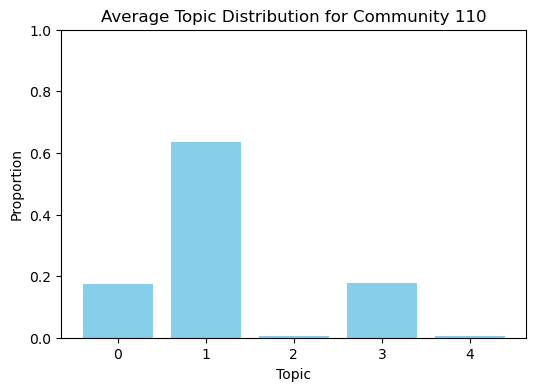

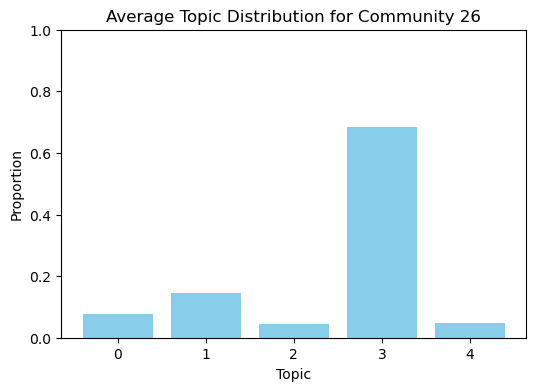

In [107]:
import re
import numpy as np
import graph_tool.all as gt
import matplotlib.cm as cm
from collections import defaultdict
import matplotlib.pyplot as plt

# For text processing and LDA
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Download stopwords if needed
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# ======================================================
# (A) Load WebKB Dataset and Build the Graph
# ======================================================
from torch_geometric.datasets import WebKB

# Load the WebKB dataset (using Cornell as an example)
dataset = WebKB(root='/tmp/WebKB', name='Cornell')
print(f"Dataset: {dataset}")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of classes: {dataset.num_classes}")
print(f"Number of node features: {dataset.num_node_features}")

# Extract the graph data
data = dataset[0]
print(data)
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")

# Convert PyG data to a directed NetworkX graph
G_nx = to_networkx(data, to_undirected=False)

# Convert NetworkX graph to Graph-Tool graph
G_gt = gt.Graph(directed=True)
G_gt.add_edge_list(G_nx.edges())

# Before running SBM, add a vertex property to store the original index.
nodes_list = list(G_nx.nodes())
orig_idx_prop = G_gt.new_vertex_property("int")
for i, v in enumerate(G_gt.vertices()):
    orig_idx_prop[v] = nodes_list[i]

# ======================================================
# (B) Run SBM and Filter Out Small Communities (<10 nodes)
# ======================================================
state = gt.minimize_blockmodel_dl(G_gt)
sbm_labels = state.get_blocks().a  # Community labels from SBM

# Create a vertex property to store SBM labels in the Graph-Tool graph
vprop = G_gt.new_vertex_property("int")
for v in G_gt.vertices():
    vprop[v] = sbm_labels[int(v)]

# Print detected communities
num_detected_communities = len(set(sbm_labels))
print(f"SBM detected {num_detected_communities} communities")

# Identify and remove communities with fewer than 10 nodes
unique_labels, counts = np.unique(sbm_labels, return_counts=True)
small_comms = unique_labels[counts < 10]
print("Communities with fewer than 10 nodes:", small_comms)

vertices_to_remove = [v for v in G_gt.vertices() if vprop[v] in small_comms]
print(f"Removing {len(vertices_to_remove)} vertices.")
G_gt.remove_vertex(vertices_to_remove, fast=True)

# Print remaining nodes per community
remaining_labels = [vprop[v] for v in G_gt.vertices()]
unique_rem, counts_rem = np.unique(remaining_labels, return_counts=True)
print("Remaining nodes per community after filtering:")
for label, count in zip(unique_rem, counts_rem):
    print(f"Community {label}: {count} nodes")

# ======================================================
# (C) Build Documents from the Bag-of-Words Feature Matrix
# ======================================================
# For WebKB, we assume that the dataset provides an actual vocabulary.
# Check if the data object has a 'vocab' attribute; otherwise, use synthetic mapping.
if hasattr(data, 'vocab'):
    vocab = data.vocab  # Assume this is a list or dict mapping indices to actual words.
    # If vocab is a dict, ensure keys are indices and values are the actual words.
else:
    vocab = {i: f"word_{i}" for i in range(data.num_node_features)}
    print("Using synthetic vocabulary mapping.")

# Convert data.x to a NumPy array (if it's a torch tensor)
x_np = data.x.cpu().numpy()  # shape: (num_nodes, num_node_features)

remaining_docs = []
vertex_communities = []  # record community label for each document

for v in G_gt.vertices():
    orig_idx = int(orig_idx_prop[v])
    # Get the bag-of-words vector for this node
    bow_vector = x_np[orig_idx]
    # Map nonzero feature indices to words (using the actual vocab if available)
    words = [vocab[i] for i, val in enumerate(bow_vector) if val > 0]
    # Construct the document as a space-separated string of words
    doc = " ".join(words)
    remaining_docs.append(doc)
    vertex_communities.append(vprop[v])

# ======================================================
# (D) Preprocess Documents and Apply LDA
# ======================================================
# Preprocess: tokenize, remove stop words, and stem.
# Also build a mapping to revert from stemmed word to original.
global_stem_mapping = {}
def preprocess_document(doc):
    tokens = re.findall(r'\b\w+\b', doc.lower())
    filtered_tokens = []
    for token in tokens:
        if token in stop_words:
            continue
        stem = stemmer.stem(token)
        filtered_tokens.append(stem)
        if stem not in global_stem_mapping:
            global_stem_mapping[stem] = token  # store original form
    return filtered_tokens

processed_docs = [preprocess_document(doc) for doc in remaining_docs]

# Build gensim dictionary and corpus for LDA
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Set number of topics (adjust as needed)
num_topics = 5
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
               random_state=42, passes=10)

# Print top words for each topic (using the unstemmed mapping)
num_top_words = 10
print("\nTop words per topic (actual words):")
for topic_id in range(num_topics):
    topic = lda.show_topic(topic_id, topn=num_top_words)
    unstemmed_words = [global_stem_mapping.get(stem, stem) for stem, weight in topic]
    print(f"Topic {topic_id}: {unstemmed_words}")

# ======================================================
# (E) Compute Average Topic Distribution per Community
# ======================================================
topic_distributions = []
for bow in corpus:
    doc_topics = lda.get_document_topics(bow, minimum_probability=0)
    dist = np.zeros(num_topics)
    for topic_id, prob in doc_topics:
        dist[topic_id] = prob
    topic_distributions.append(dist)
topic_distributions = np.array(topic_distributions)

community_topic_avg = defaultdict(list)
for comm, dist in zip(vertex_communities, topic_distributions):
    community_topic_avg[comm].append(dist)
for comm in community_topic_avg:
    community_topic_avg[comm] = np.mean(community_topic_avg[comm], axis=0)

print("\nAverage Topic Distribution per Community:")
for comm, avg_dist in community_topic_avg.items():
    print(f"Community {comm}: {avg_dist}")

# ======================================================
# (F) Visualization: Plot Topic Proportions for Selected Communities
# ======================================================
def plot_topic_distribution_for_community(comm, avg_dist):
    plt.figure(figsize=(6,4))
    topics = list(range(num_topics))
    plt.bar(topics, avg_dist, color='skyblue')
    plt.xlabel('Topic')
    plt.ylabel('Proportion')
    plt.title(f"Average Topic Distribution for Community {comm}")
    plt.xticks(topics)
    plt.ylim(0, 1)
    plt.show()

# Visualize topic proportions for selected communities (adjust as desired)
selected_communities = list(community_topic_avg.keys())[:3]  # e.g., first three communities
for comm in selected_communities:
    plot_topic_distribution_for_community(comm, community_topic_avg[comm])

## Trying another dataset

In [2]:
from TAGLAS import get_dataset
dataset = get_dataset("arxiv")

ModuleNotFoundError: No module named 'TAGLAS'